In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Reviews.csv to Reviews.csv


In [3]:
df = pd.read_csv('Reviews.csv')
print(df.shape)

(568454, 10)


In [6]:
df = df.head(500)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## EDA

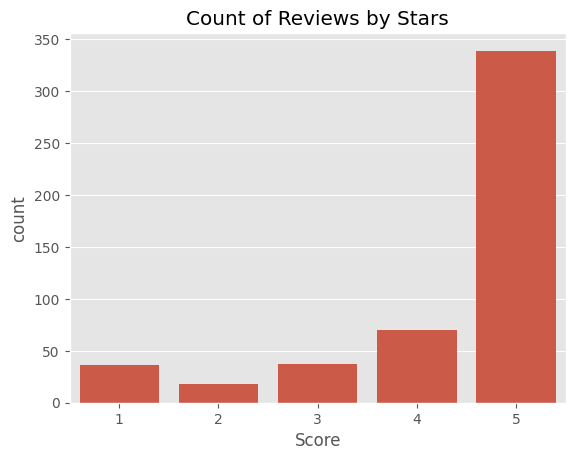

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Score', data=df, order=sorted(df['Score'].unique()))
plt.title("Count of Reviews by Stars")
plt.show()

## VADER Seniment Scoring

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import nltk

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [10]:
vaders = df.copy()
vaders = vaders.join(vaders['Text'].apply(lambda x: pd.Series(sia.polarity_scores(x))))

In [11]:
vaders.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468


In [12]:
vaders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      500 non-null    int64  
 1   ProductId               500 non-null    object 
 2   UserId                  500 non-null    object 
 3   ProfileName             500 non-null    object 
 4   HelpfulnessNumerator    500 non-null    int64  
 5   HelpfulnessDenominator  500 non-null    int64  
 6   Score                   500 non-null    int64  
 7   Time                    500 non-null    int64  
 8   Summary                 500 non-null    object 
 9   Text                    500 non-null    object 
 10  neg                     500 non-null    float64
 11  neu                     500 non-null    float64
 12  pos                     500 non-null    float64
 13  compound                500 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory 

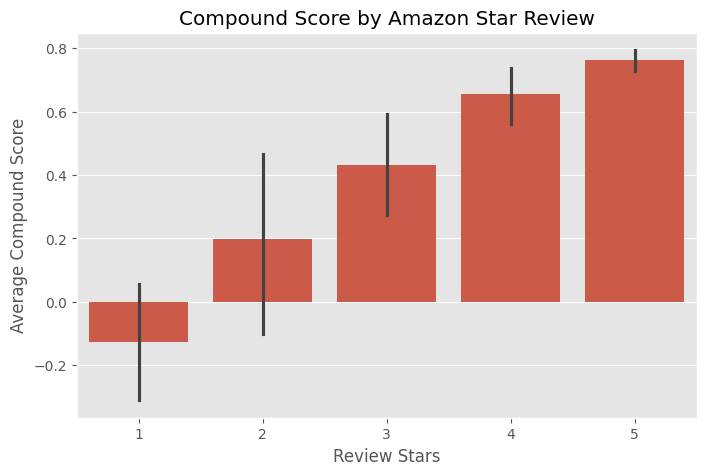

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(data=vaders, x='Score', y='compound', order=sorted(vaders['Score'].unique()))
plt.title('Compound Score by Amazon Star Review')
plt.xlabel('Review Stars')
plt.ylabel('Average Compound Score')
plt.show()

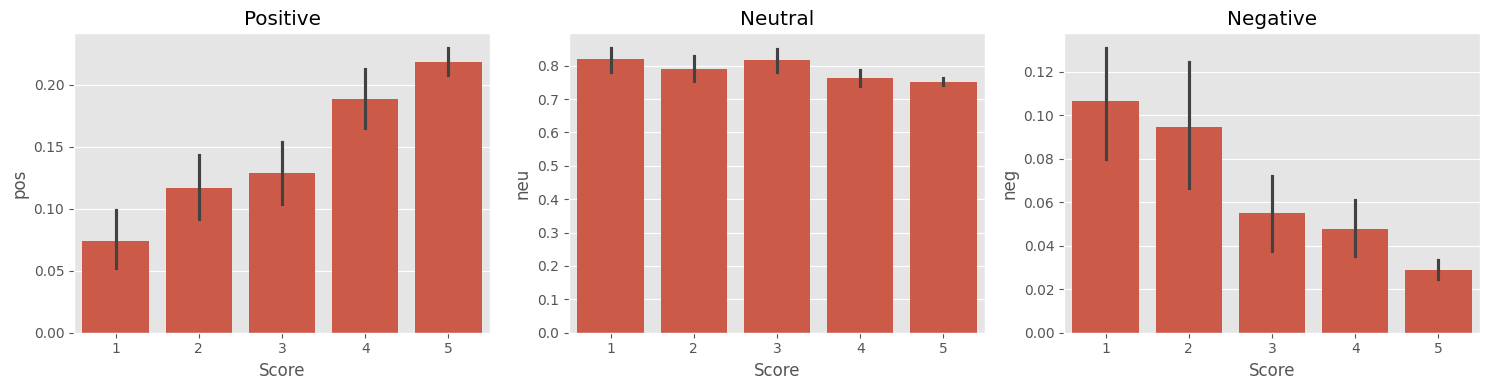

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Roberta Pretrained Model

In [15]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [16]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [18]:
def polarity_scores_roberta(example):
    # Ensure text is a string
    if not isinstance(example, str):
        return {'roberta_neg': 0.0, 'roberta_neu': 0.0, 'roberta_pos': 0.0}

    # Handle empty string case
    if not example.strip():
        return {'roberta_neg': 0.0, 'roberta_neu': 1.0, 'roberta_pos': 0.0}

    encoded_text = tokenizer(example, return_tensors='pt', truncation=True, max_length=512)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    # The model 'cardiffnlp/twitter-roberta-base-sentiment' outputs scores in order: neg, neu, pos
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

def compute_roberta_sentiment(text):
    try:
        # Directly call the defined polarity_scores_roberta
        return polarity_scores_roberta(text)  # should return a dict of scores
    except RuntimeError:
        return None

roberta_scores = df['Text'].apply(compute_roberta_sentiment)

# Convert the series of dicts into a DataFrame
roberta_df = pd.DataFrame(roberta_scores.tolist())

# Combine with original DataFrame
df_roberta = pd.concat([df, roberta_df], axis=1)

df_roberta.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,roberta_neg,roberta_neu,roberta_pos
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.009624,0.049980,0.940395
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.508986,0.452413,0.038600
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.003229,0.098067,0.898704
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.002295,0.090219,0.907486
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.001635,0.010302,0.988063
